In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.__version__

'1.10.0+cu111'

In [ ]:
# a PyTorch computer vision package, has a simple API for image pre-processing in its torchvision.transforms module.
# Transforms are common image transforms. They can be chained together using Compose
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

"""
First the root directory of dataset where directory cifar-10-batches-py exists or will be saved to if download is set to True.
train (bool, optional) – If True, creates dataset from training set, otherwise creates from test set.
transform (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop
target_transform (callable, optional) – A function/transform that takes in the target and transforms it.
download (bool, optional) – If true, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.
"""

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) # 

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


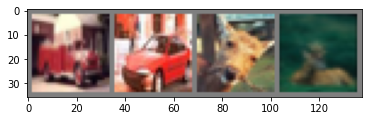

truck car   deer  deer 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to display an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 90, 5) # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.pool = nn.MaxPool2d(2, 2) # torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.conv2 = nn.Conv2d(90, 100, 5)
        self.fc1 = nn.Linear(100 * 5 * 5, 200) # torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels=labels.to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.004
[1,  4000] loss: 1.640
[1,  6000] loss: 1.493
[1,  8000] loss: 1.395
[1, 10000] loss: 1.319
[1, 12000] loss: 1.227
[2,  2000] loss: 1.145
[2,  4000] loss: 1.084
[2,  6000] loss: 1.059
[2,  8000] loss: 1.029
[2, 10000] loss: 0.982
[2, 12000] loss: 0.963
[3,  2000] loss: 0.855
[3,  4000] loss: 0.850
[3,  6000] loss: 0.835
[3,  8000] loss: 0.816
[3, 10000] loss: 0.803
[3, 12000] loss: 0.803
[4,  2000] loss: 0.660
[4,  4000] loss: 0.688
[4,  6000] loss: 0.676
[4,  8000] loss: 0.673
[4, 10000] loss: 0.675
[4, 12000] loss: 0.694
[5,  2000] loss: 0.529
[5,  4000] loss: 0.546
[5,  6000] loss: 0.568
[5,  8000] loss: 0.555
[5, 10000] loss: 0.593
[5, 12000] loss: 0.587
[6,  2000] loss: 0.406
[6,  4000] loss: 0.451
[6,  6000] loss: 0.457
[6,  8000] loss: 0.466
[6, 10000] loss: 0.471
[6, 12000] loss: 0.493
[7,  2000] loss: 0.305
[7,  4000] loss: 0.329
[7,  6000] loss: 0.366
[7,  8000] loss: 0.388
[7, 10000] loss: 0.386
[7, 12000] loss: 0.404
[8,  2000] loss: 0.226
[8,  4000] 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH, _use_new_zipfile_serialization=False)

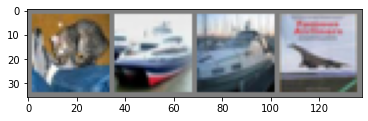

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  truck plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


In [ ]:
import torch
import torch.onnx

# A model class instance (class not shown)
net = Net()

# Load the weights from a file (.pth usually)
state_dict = torch.load('/content/cifar_net.pth')

# Load the weights now into a model net architecture defined by our class
net.load_state_dict(state_dict)

# Create the right input shape (e.g. for an image)
dummy_input = torch.randn(4, 3, 32, 32)

torch.onnx.export(net, dummy_input, "cifar.onnx")

In [ ]:
import cv2
import time

cap = cv2.VideoCapture(0)
frame_rate = 70
prev = 0

while (cap.isOpened()):

    time_elapsed = time.time() - prev
    ret, frame = cap.read()

    if time_elapsed > 1./frame_rate:
        prev = time.time()

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(frame)

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
          break

cap.release()
cv2.destroyAllWindows()